In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
def custom_func(elem):
    return(elem[1])

In [3]:
%%time 
file = pd.read_csv('soc-redditHyperlinks-body.tsv', delimiter='\t')


Wall time: 3.81 s


In [4]:
%%time
u_source = file['SOURCE_SUBREDDIT'].unique().tolist()
u_target = file['TARGET_SUBREDDIT'].unique().tolist()
u_source.extend(u_target)
Vertices_list = list(dict.fromkeys(u_source))
Vertices_list.sort()
len(Vertices_list)

Wall time: 111 ms


35776

In [5]:
#creation of edge list

In [6]:
%%time
Edges_list = list(zip(file['SOURCE_SUBREDDIT'],file['TARGET_SUBREDDIT']))
Edges_list.sort()
Edges_unique = list(dict.fromkeys(Edges_list))
len(Edges_unique)

Wall time: 442 ms


137821

In [7]:
# Creation of adjacency matrix and adjacency list

In [8]:
%%time
V = len(Vertices_list)

Adj_Mat = np.zeros((V,V),dtype=int)

Adj_list = []
for s in range(V):
    Adj_list.append([])

for i in Edges_unique:
    a = Vertices_list.index(i[0])
    b = Vertices_list.index(i[1])
    Adj_Mat[a][b]=1
#     Adj_list[a].append(i[1])


Wall time: 1min 41s


In [9]:
%%time
# V = len(Vertices_list)

# Adj_Mat = np.zeros((V,V),dtype=int)

Adj_list = []
for s in range(V):
    Adj_list.append([])

for i in Edges_unique:
    a = Vertices_list.index(i[0])
#     b = Vertices_list.index(i[1])
#     Adj_Mat[a][b]=1
    Adj_list[a].append(i[1])


Wall time: 42.6 s


In [21]:
# %%time
# V = len(Vertices_list)
# #
# # Adj_Mat = np.zeros((V,V),dtype=int)

# Adj_list = []
# for s in range(V):
#     Adj_list.append([])

# for i in Edges_unique:
#     a = Vertices_list.index(i[0])
#     b = Vertices_list.index(i[1])
# #     Adj_Mat[a][b]=1
#     Adj_list[a].append(i[1])


In [22]:
%%time
count_vertex = 0    
count = []
for i in range(len(Adj_list)):
    count_vertex = len(Adj_list[i])
    a = [Vertices_list[i],count_vertex]
    count.append(a)


Wall time: 39.9 ms


Text(0.5, 1.0, 'top 20 popuplar sub-reddits')

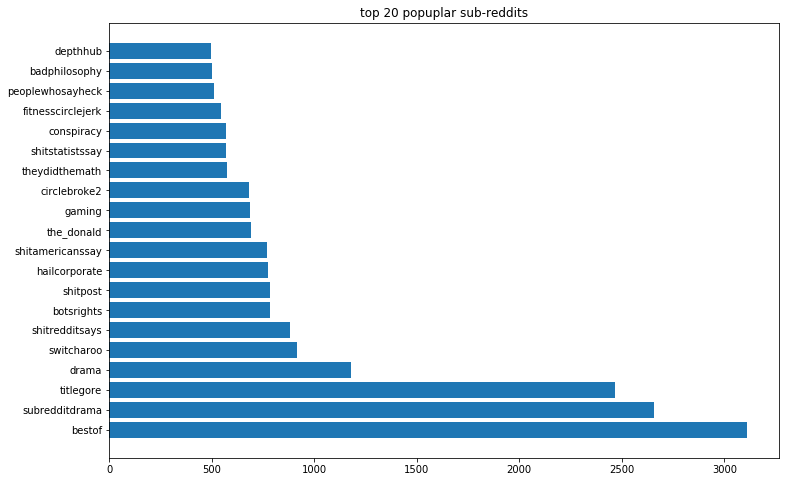

In [23]:
count.sort(key=custom_func,reverse=True)
x = []
y = []
for i in range(20):
    x.append(count[i][0])
    y.append(count[i][1])    

plt.figure(figsize=(12,8))
plt.barh(x,y)
plt.title("top 20 popuplar sub-reddits")

In [24]:
# Stroing Adj matrix and Adj list as csv

In [25]:
# np.savetxt('Adjacency_Matrix.csv',Adj_Mat,delimiter = ',')
# np.savetxt('Adjacency_list.csv',Adj_list,delimiter = ',')

In [26]:
#Triple-store query to be executed in Neo4j

In [27]:
# load csv from 'file:///soc-redditHyperlinks-title.tsv' as graph FIELDTERMINATOR '\t' create (node1:source{name:graph[0]})-[r:Sentiment {name:graph[4]}]-> (node2:target{name:graph[1]})

In [28]:
#insight - 1

In [29]:

origin_nodes = list(set(u_source).difference(u_target))
dest_nodes   = list(set(u_target).difference(u_source))
origin_nodes.sort()
dest_nodes.sort()
print(" no:of source nodes :",len(origin_nodes))
print(" no:of target nodes :",len(dest_nodes))

 no:of source nodes : 27187
 no:of target nodes : 0


In [30]:

def Vertices(node):
    for i in range(len(Vertices_list)):
        if node == Vertices_list[i]:
#             print(i)
            return i

def Matrix(index):
    for i in range(len(Adj_Mat[index])):
        if Adj_Mat[index][i]==1:
#             print(Vertices_list[i])
            return Vertices_list[i]


In [31]:
# ### %%time
# src = origin_nodes[1]
# trg = ''
# path1 = [] 
# path1.append(src)

# for i in range(V):
# #     trg = Matrix(Vertices(src))
# #     path1.append(src)
#     path1.append(trg)
#     src = trg
#     try:
#         b=path1.index(src)
#     except ValueError:
#         continue
# #     if isinstance(b,int):
# #         break
# print(path1)

# # for i in range(len(Vertices_list)):
# #     if src == Vertices_list[i] : 
# #         for j in range(len(Adj_Mat[i]):
# #             if Adj_Mat[i][j] == 1 :
# #                 path.append[[Vertices_listtices_list[i],Vertices_list[j]]]
# #                 src = Vertices_list[j]

In [47]:
%%time 
path_length = []
for node in origin_nodes:
    src = node
    path = []
    trg = ''
    path.append(src)
    exists=True

    while exists:
        index = Vertices_list.index(src)
        if len(Adj_list[index])>0:
            trg   = Adj_list[index][0]  
            for element in path:
                if element == trg:                    
#                     check for next adjacent node
                    trg = Adj_list[index][0]  
                    exists = False
                
            if exists:
                path.append(trg)
                src = trg
        else:
            exists=False
    path_length.append(len(path))

Wall time: 56.5 s


In [48]:
avg = 0
sum = 0
for i in range(len(path_length)):
    sum += path_length[i]
avg = int(sum/(i+1))
avg


4

In [ ]:
# src = origin_nodes[38]
# trg = ''
# for i in Edges_unique :
#     if src == i[0] :
#         print(i)
#         trg = i[1]
#         for j in Edges_unique:
#             if trg == i[0]:
#                 print(j)
#                 src = trg
# #                 break
    

In [ ]:
# Col_count_AM.max()
# Col_list_AM = Col_countAM.tolist()
# indd = Col_list_AM.index(Col_countAM.max())
# print(Vertices_list[indd])

In [ ]:
#askreddit is the sub reddit with most number of redirects from the other sub reddits.

In [28]:
count = 0
for i in range(len(Adj_Mat)):
    if Adj_Mat[i][i]==1:
        count+=1
print(count)

0


In [29]:
#it is a network with no subreddits redirecting to itself without any intermediatort nodes

In [30]:
#'bestof' is the sub reddit which has been linked the most to other subreddits.....or 'bestof' is the subreddit with highest number of responses
#subreddit with most responses = 'bestof'
#subreddit which answered more no:of subreddits = 'askreddit'

In [31]:
Adj_Mat[Vertices_list.index('bestof')][indd]

1

In [32]:
# path length of subreddit - 'bestof' to get to the subreddit - 'askreddit'
# path length of each node to get to the subreddit - 'askreddit'

In [33]:
Adj_Mat[Vertices_list.index('bestof')]

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
# for node in Adj_list(Vertices_list.index('bestof')):
#     if node == Vertices_list[indd]:
#         print("found askreddit")
#         break
#     else :
#         for i in Adj_list[node]:
            


In [35]:
#Insight - 1

In [36]:
# (1-1) Nodes from which many outward nodes are connected
# using adjacency matrix/adjacency list
# rowcount in adj_mat / length of a sub-list in edge list

In [37]:
%%time

#wall time using adjacency list

count_vertex = 0    
count = []
for i in range(len(Adj_list)):
    count_vertex = len(Adj_list[i])
    a = [Vertices_list[i],count_vertex]
    count.append(a)

Wall time: 401 ms


In [38]:
%%time

# wall time using adjacency matrix

count = []
for i in range(len(Adj_Mat)):
    count_vertex = Adj_Mat[i].sum()
#     print(count_vertex)
    a = [Vertices_list[i],count_vertex]
    count.append(a)


Wall time: 13.6 s


Text(0.5, 1.0, 'top 20 popuplar sub-reddits')

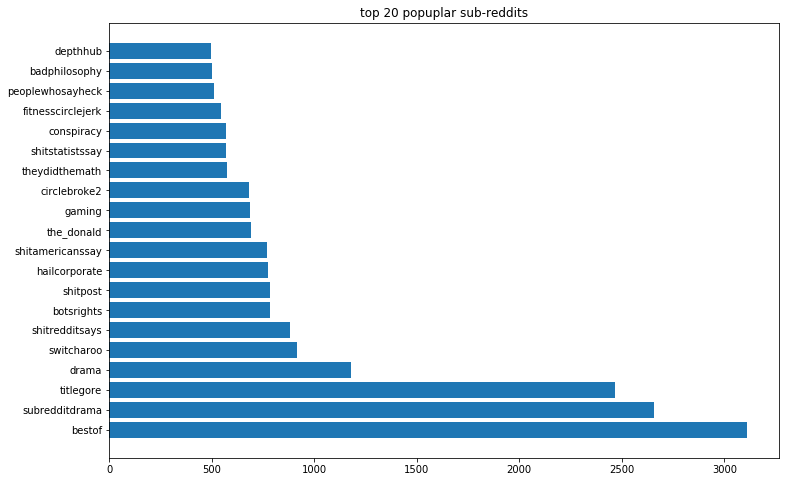

In [40]:
count.sort(key=custom_func,reverse=True)
x = []
y = []
for i in range(20):
    x.append(count[i][0])
    y.append(count[i][1])    

plt.figure(figsize=(12,8))
plt.barh(x,y)
plt.title("top 20 popuplar sub-reddits")

In [41]:
# (1-2) Nodes to which many nodes are connected (inward connecteions)
#  using adjacency matrix
# Col_count in adj_mat 

In [98]:
count_col = Adj_Mat.sum(axis=0)
Col_list = count_col.tolist()
indd = Col_list.index(count_col.max())
print(count_col.max())
print(Vertices_list[indd])

4164
askreddit


In [99]:
# (1-3) Most n(times) one subreddit is linked to another subreddit based  on PostIDs
# using triple-store